In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("poly.csv")
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


In [25]:
df.isnull().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [26]:
df.drop(columns=["sno"], inplace=True)
df

#x = df.iloc [:,1:2]

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

<Axes: xlabel='Temperature', ylabel='Pressure'>

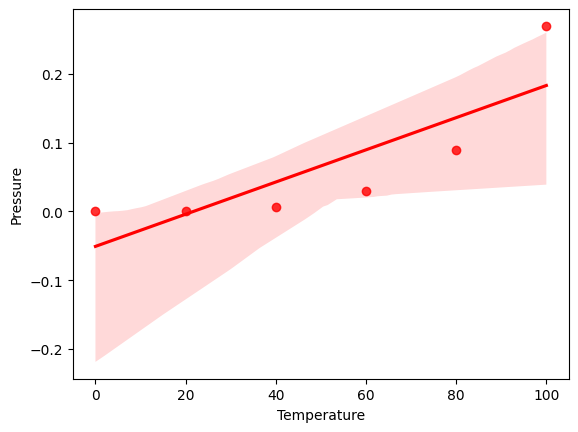

In [28]:
sns.regplot(x=x,y=y,color="r")

In [29]:
df.corr(numeric_only = True)

,Temperature,Pressure
Temperature,1.000000,0.830873
Pressure,0.830873,1.000000


In [30]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

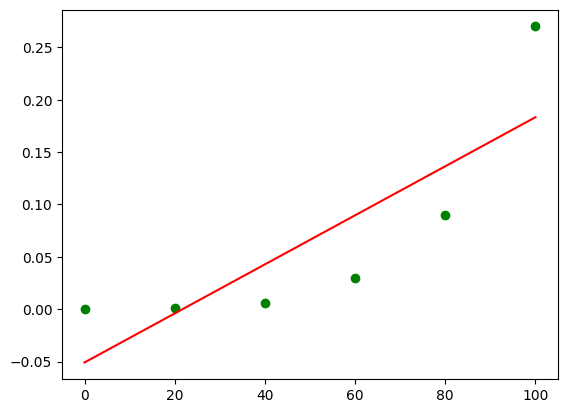

In [32]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color='r')

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print("MAE:",mean_absolute_error(y,y_pred))
print("MSE:",mean_squared_error(y,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y,y_pred)))
print("mape:",np.mean(np.abs((y - y_pred) / y)) * 100)
x.shape,y.shape

MAE: 0.047653333333333346
MSE: 0.002870267555555557
RMSE: 0.053574878026511244
mape: 4477.507818930042


((6, 1), (6,))

In [34]:
r2_sc = r2_score(y,y_pred)
r2_sc

0.690349972603981

In [35]:
#Polynomial model

#expanding the degeree of input feature(temperature)

from sklearn.preprocessing import PolynomialFeatures
feature = PolynomialFeatures(degree=2) #degree
x_poly = feature.fit_transform(x)
x_poly #Now input feature is in x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [36]:
x_poly.shape

(6, 3)

In [37]:
model1 = LinearRegression() #We already imported linear regression
model1.fit(x_poly,y)
y_poly = model1.predict(x_poly)
y_poly

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [38]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [39]:
mape1 = mean_absolute_percentage_error(y,y_poly)
mape1

15.926055555557816

In [40]:
r2_sc1= r2_score(y,y_poly)
r2_sc1

0.9568461098911795

In [41]:
#Data frame Actual value, simpleregression value,polynomial regression value
df1 = pd.DataFrame({"Actual Value" : y,"Simple_Reg": y_pred,"Polynomial_Reg":y_poly})
df1

,Actual Value,Simple_Reg,Polynomial_Reg
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975


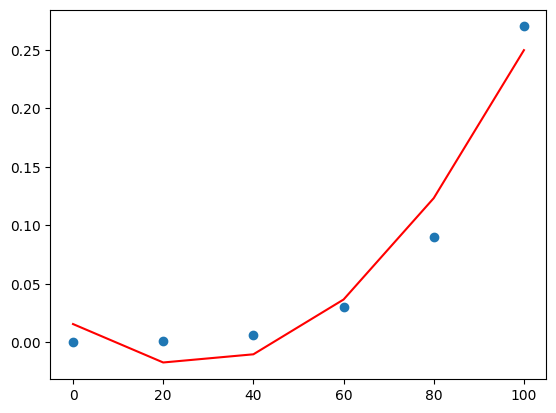

In [43]:
plt.scatter(x,y) 
plt.plot(x,y_poly,color='r')